<a href="https://colab.research.google.com/github/kristipatithoyajakshakashyap/Machine-Learning/blob/main/Gender%20Prediction/Gender_Preddiction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
# Loading the data from csv to pandas dataframe
voice_data = pd.read_csv('/content/voice.csv')

In [33]:
# 1st 5 rows of dataframe
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [34]:
# no of rows and columns
voice_data.shape

(3168, 21)

In [35]:
# getting statistical measures of the data

voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [36]:
# label encoding
voice_data.replace({'label':{'male':0,'female':1}}, inplace=True)

In [37]:
# sepearate features and target

X = voice_data.drop(columns='label',axis=1)
Y = voice_data['label']

Data Standardization

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(X)

StandardScaler()

In [40]:
standardized_data = scaler.transform(X)

Spliting the training and testing data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [55]:
X_train.shape[0]

2534

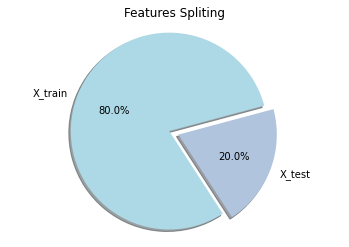

In [58]:
distribution = [X_train.shape[0],X_test.shape[0]]
my_labels = 'X_train','X_test'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(distribution, labels=my_labels, autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors,explode=my_explode)
plt.title('Features Spliting')
plt.axis('equal')
plt.show()

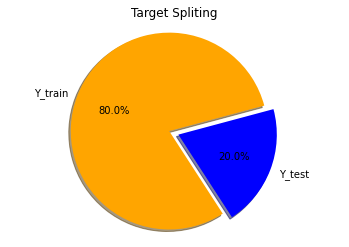

In [60]:
distribution = [Y_train.shape[0],Y_test.shape[0]]
my_labels = 'Y_train','Y_test'
my_colors = ['orange','blue']
my_explode = (0, 0.1)
plt.pie(distribution, labels=my_labels, autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors,explode=my_explode)
plt.title('Target Spliting')
plt.axis('equal')
plt.show()

Training the model: Logistic Regression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Evaluation

In [44]:
# accuracy for training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [45]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9064719810576164


In [46]:
#accuracy of the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8753943217665615


In [48]:
input_data = (0.0597809849598081,0.0642412677031359,0.032026913372582,0.0150714886459209,0.0901934398654331,0.0751219512195122,12.8634618371626,274.402905502067,0.893369416700807,0.491917766397811,0,0.0597809849598081,0.084279106440321,0.0157016683022571,0.275862068965517,0.0078125,0.0078125,0.0078125,0,0)
#change data to numpy array
input_data_as_nparray = np.asarray(input_data)

#reshape array
input_data_reshape = input_data_as_nparray.reshape(1,-1)

# standardising the input data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Male')
else:
  print('Female')

[[-4.04924806  0.4273553  -4.22490077 -2.57610164 -5.69360723 -0.21477826
   2.29330585  1.76294635 -0.03908279  0.4715753  -2.14121031 -4.04924806
  -1.81203825 -1.0979981   0.56595854 -1.5642046  -0.70840431 -1.43142165
  -1.41913712 -1.45477229]]
[0]
Male


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
